In [1]:
# 경고메세지 제거
import warnings
warnings.filterwarnings('ignore')
# library import
import numpy as np
import pandas as pd
import glob
# 시각화 library import
!pip install missingno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#한글폰트 오류안나게
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_fname = 'C:\\Windows\\Fonts\\batang.ttc' # 아래한글 함초롱바탕 글꼴
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams['font.family'] = font_family

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\HCW\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
data = pd.read_csv('카드상품1.csv', encoding='utf-8')
data.head()

,순위,카드명,카드사,교육,교통_주유,교통_정비,교통_통행료,교통_버스지하철,교통_택시,교통_철도버스,...,여유생활_숙박,여유생활_여행,여유생활_항공,여유생활_기타,요식,의료,일상생활,해외,전월실적,기타
0,1,신한카드 Mr.Life,신한카드,0,1,0,0,0,1,0,...,0,0,0,0,1,1,1,0,300000,NaN
1,2,삼성카드 taptap O,삼성카드,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,500000,NaN
2,3,현대카드 M,현대카드,0,1,1,0,1,0,0,...,1,1,1,1,1,1,1,1,400000,NaN
3,4,KB국민 My WE:SH 카드,KB국민카드,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,300000,NaN
4,5,삼성카드 & MILEAGE PLATINUM,삼성카드,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,NaN


In [3]:
data.columns

Index(['순위', '카드명', '카드사', '교육', '교통_주유', '교통_정비', '교통_통행료', '교통_버스지하철',
       '교통_택시', '교통_철도버스', '납부_통신비', '납부_관리비', '납부_렌탈료', '납부_가스전기', '납부_보험',
       '납부_유선방송', '납부_건강연금', '납부_기타', '사교활동', '쇼핑_도소매', '쇼핑_백화점', '쇼핑_마트',
       '쇼핑_슈퍼마켓', '쇼핑_편의점', '쇼핑_아울렛', '쇼핑_온라인', '쇼핑_기타', '여유생활_운동', '여유생활_Pet',
       '여유생활_공연', '여유생활_공원', '여유생활_숙박', '여유생활_여행', '여유생활_항공', '여유생활_기타', '요식',
       '의료', '일상생활', '해외', '전월실적', '기타'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   순위        100 non-null    int64 
 1   카드명       100 non-null    object
 2   카드사       100 non-null    object
 3   교육        100 non-null    int64 
 4   교통_주유     100 non-null    int64 
 5   교통_정비     100 non-null    int64 
 6   교통_통행료    100 non-null    int64 
 7   교통_버스지하철  100 non-null    int64 
 8   교통_택시     100 non-null    int64 
 9   교통_철도버스   100 non-null    int64 
 10  납부_통신비    100 non-null    int64 
 11  납부_관리비    100 non-null    int64 
 12  납부_렌탈료    100 non-null    int64 
 13  납부_가스전기   100 non-null    int64 
 14  납부_보험     100 non-null    int64 
 15  납부_유선방송   100 non-null    int64 
 16  납부_건강연금   100 non-null    int64 
 17  납부_기타     100 non-null    int64 
 18  사교활동      100 non-null    int64 
 19  쇼핑_도소매    100 non-null    int64 
 20  쇼핑_백화점    100 non-null    int64 
 21  쇼핑_마트     100 non

In [5]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

기타    87
dtype: int64


In [7]:
data['카드사'].value_counts()


카드사
삼성카드       16
신한카드       15
현대카드       15
KB국민카드     10
우리카드       10
하나카드        8
롯데카드        7
NH농협카드      7
IBK기업은행     6
BC카드        5
현대백화점       1
Name: count, dtype: int64

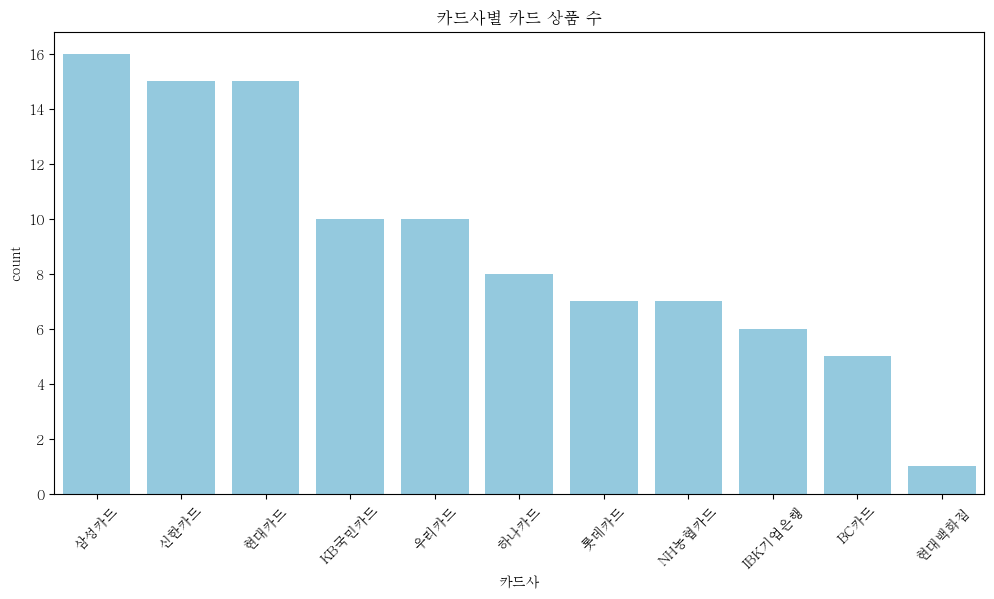

In [14]:

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='카드사', order=data['카드사'].value_counts().index, color='skyblue')
plt.title("카드사별 카드 상품 수")
plt.xticks(rotation=45)
plt.show()



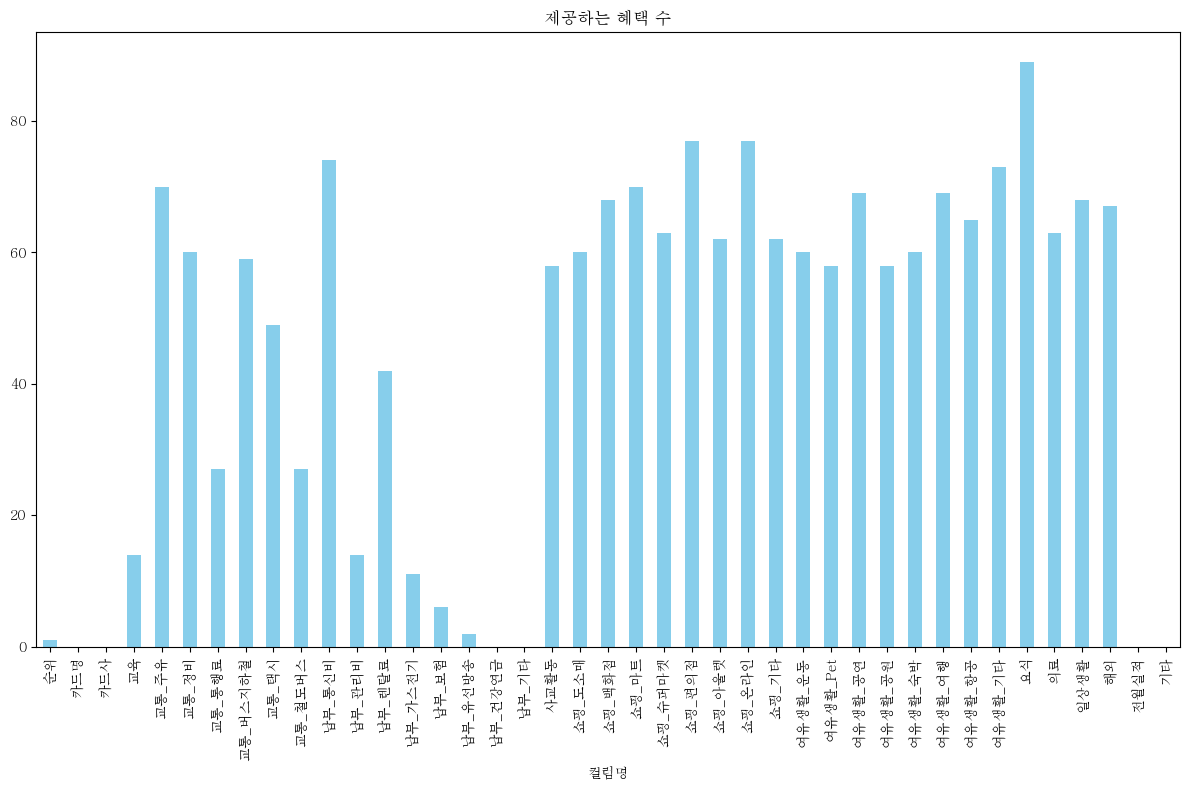

In [13]:
count_of_ones = (data == 1).sum()

# 시각화
plt.figure(figsize=(12, 8))
count_of_ones.plot(kind='bar',color='skyblue')
plt.title("제공하는 혜택 수")
plt.xlabel("컬럼명")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

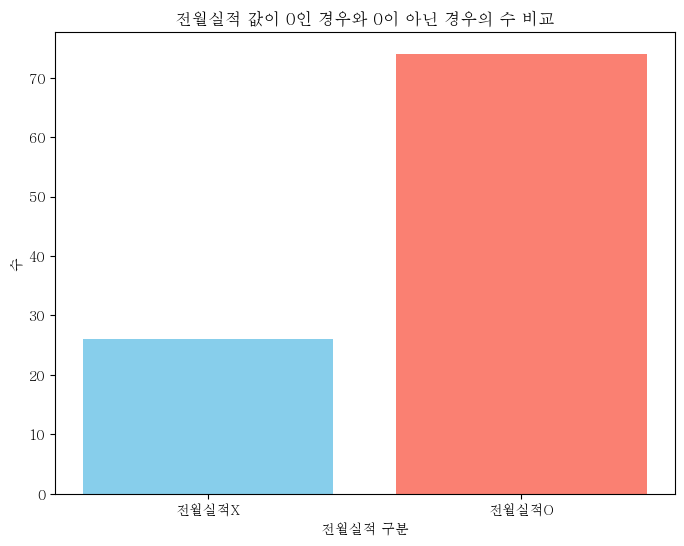

In [16]:
plt.figure(figsize=(8, 6))
plt.bar(['전월실적X', '전월실적O'], [(data['전월실적'] == 0).sum(),(data['전월실적'] != 0).sum()], color=['skyblue', 'salmon'])
plt.title("전월실적 값이 0인 경우와 0이 아닌 경우의 수 비교")
plt.xlabel("전월실적 구분")
plt.ylabel("수")
plt.show()

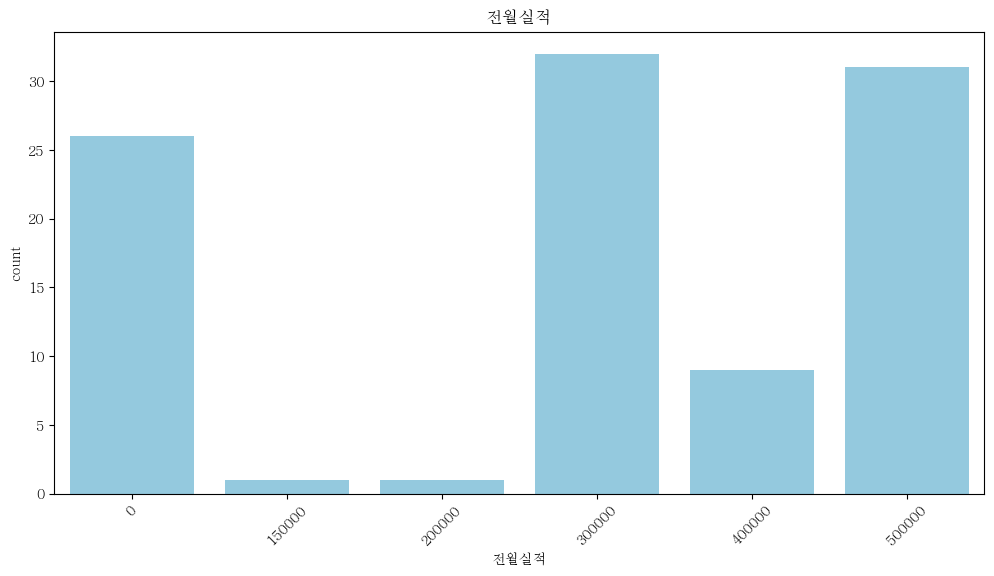

In [19]:

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='전월실적', order=sorted(data['전월실적'].value_counts().index), color='skyblue')
plt.title("전월실적")
plt.xticks(rotation=45)
plt.show()

